# Importing Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Checking the version of python installed

In [ ]:
pip --version

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


# Importing all the packages and modules required for running the code successfully

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as XGBClassifier
from sklearn import tree
from sklearn.kernel_approximation import RBFSampler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dense
import seaborn as sns
from sklearn.pipeline import make_pipeline
import tensorflow as tf


# Importing the data into data variable and extracting input data and output data separately

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/changeinput.csv")
X = data[["input1","input2","input3","input4","input5","input6","input7","input8","input9","input10"]].values
y = data["label"].values
print(X)
print(y)

[[ 75.21618652  59.84922272  59.3260498  ...  22.89593506 127.8929443
   73.3951882 ]
 [103.0291748   56.94382536  91.24731445 ...  14.8013916  128.1558838
   73.60798441]
 [ 89.33911133  67.94739064  70.1305542  ...  26.06427002 128.4572754
   72.97810604]
 ...
 [ 93.62158203  49.87641943  81.79931641 ...  -2.12536621 128.1085815
   73.68545152]
 [ 87.67547607  53.30292213  71.87310791 ...  33.11206055 127.9208374
   73.69478134]
 [ 73.91497803  54.17613293  52.5536499  ...  38.90924072 128.0888672
   73.39878825]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1

# Splitting the dataset into training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1.Building RBF Neural Network with customized rbf activation function and keras library and measuring the performance of algorithm using Performance Metric MSE. Visualizing the output using scatter plot

6/6 [==============================] - 0s 2ms/step
Mean Squared Error: 0.18040012011880077
Accuracy: 0.7457627118644068


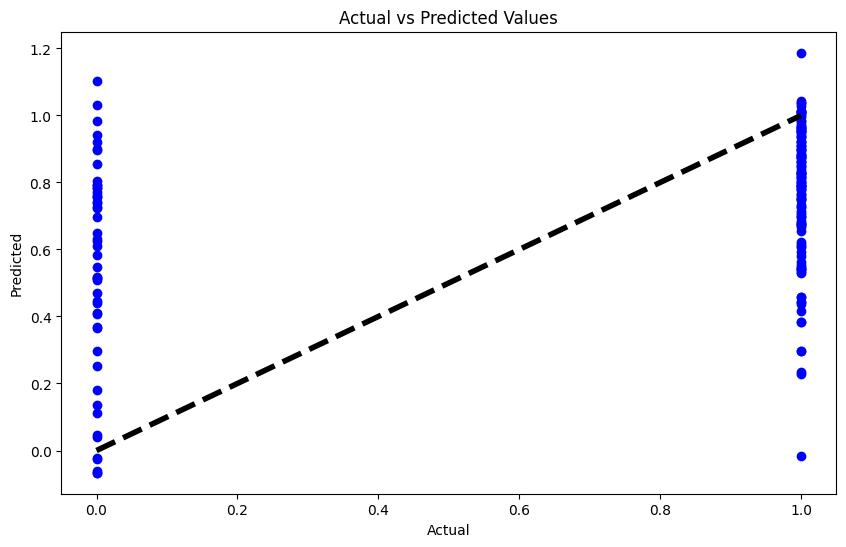

In [ ]:

def rbf_activation(x):
    return tf.exp(-tf.square(x))

# Define custom RBF neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=rbf_activation, input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
threshold=0.5

# Convert predictions to binary values (if needed)
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate accuracy (if applicable)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 2. Building SVM algorithm using SVM Classifier and measuring accuracy using Accuracy score function

In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Mean Squared Error: 0.22033898305084745
Accuracy: 0.7796610169491526
Confusion Matrix:
 [[ 22  29]
 [ 10 116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.43      0.53        51
           1       0.80      0.92      0.86       126

    accuracy                           0.78       177
   macro avg       0.74      0.68      0.69       177
weighted avg       0.77      0.78      0.76       177



# 3. Building XGB Boost Algorithm using XGB Classifier and performance measured using confusion matrix and classification report

Accuracy: 0.9548022598870056
Confusion Matrix:
 [[ 47   4]
 [  4 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        51
           1       0.97      0.97      0.97       126

    accuracy                           0.95       177
   macro avg       0.94      0.94      0.94       177
weighted avg       0.95      0.95      0.95       177



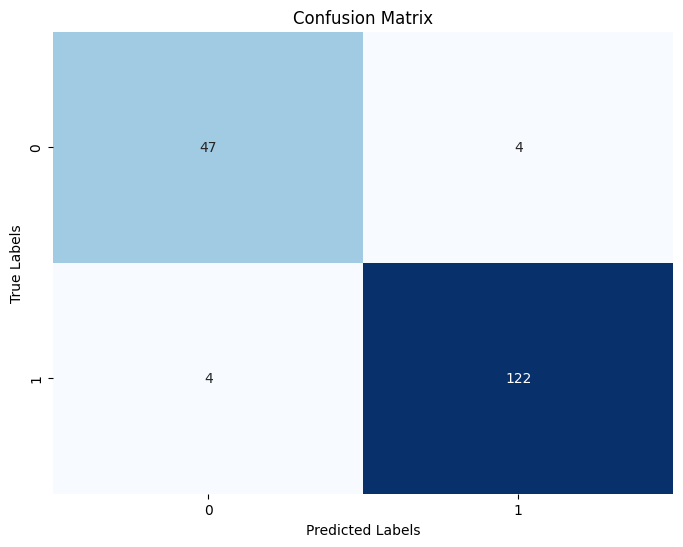

In [ ]:
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 4. Building CNN Model and visualizing the model using line chart.

Epoch 1/20
23/23 [==============================] - 1s 8ms/step - loss: 0.3121 - val_loss: 0.2460
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.2295 - val_loss: 0.2159
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.2150 - val_loss: 0.2028
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.2017 - val_loss: 0.1992
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.1876 - val_loss: 0.1798
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1813 - val_loss: 0.1713
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1688 - val_loss: 0.1684
Epoch 8/20
23/23 [==============================] - 0s 4ms/step - loss: 0.1636 - val_loss: 0.1595
Epoch 9/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1606 - val_loss: 0.1984
Epoch 10/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1651 - val_loss: 0.1637
Epoch 11/20
23/23 [

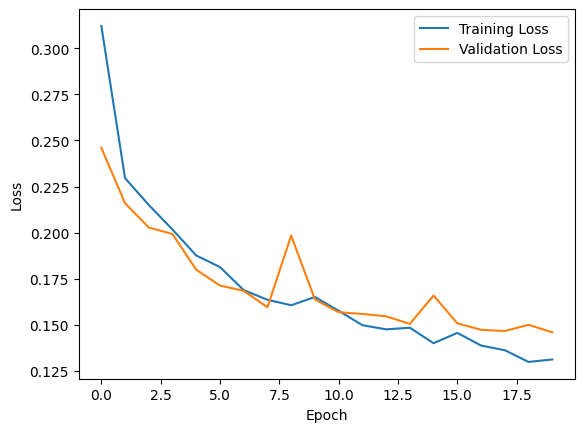

In [ ]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Step 5: Build CNN Model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Step 6: Compile the Model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Step 7: Train the Model
history=model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Step 8: Model Evaluation
predictions = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
y_pred_binary = (y_pred > threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



## 5. Building model using Logistic regression and performance measured using Classification report and confusion matrix.

In [ ]:
logistic_reg_model = LogisticRegression(random_state=42)
logistic_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_reg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7796610169491526
Confusion Matrix:
[[ 24  27]
 [ 12 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.47      0.55        51
           1       0.81      0.90      0.85       126

    accuracy                           0.78       177
   macro avg       0.74      0.69      0.70       177
weighted avg       0.77      0.78      0.77       177



# 6. Building MLP algorithm using Keras library

In [ ]:
#Multi-Layer Perceptron (MLP) for rainfall estimation using Python, with the Keras library
# Create the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2)

# Evaluate the model
mse = mean_squared_error(y_test, model.predict(X_test_scaled))
print(f"Mean Squared Error: {mse}")
y_pred_binary = (y_pred > threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")


Epoch 1/20
23/23 - 1s - loss: 0.5597 - mae: 0.6379 - val_loss: 0.2818 - val_mae: 0.4476 - 617ms/epoch - 27ms/step
Epoch 2/20
23/23 - 0s - loss: 0.2401 - mae: 0.4172 - val_loss: 0.2476 - val_mae: 0.4318 - 49ms/epoch - 2ms/step
Epoch 3/20
23/23 - 0s - loss: 0.2057 - mae: 0.3941 - val_loss: 0.2169 - val_mae: 0.4054 - 71ms/epoch - 3ms/step
Epoch 4/20
23/23 - 0s - loss: 0.1880 - mae: 0.3770 - val_loss: 0.1980 - val_mae: 0.3753 - 67ms/epoch - 3ms/step
Epoch 5/20
23/23 - 0s - loss: 0.1745 - mae: 0.3490 - val_loss: 0.1894 - val_mae: 0.3655 - 55ms/epoch - 2ms/step
Epoch 6/20
23/23 - 0s - loss: 0.1629 - mae: 0.3395 - val_loss: 0.1810 - val_mae: 0.3562 - 63ms/epoch - 3ms/step
Epoch 7/20
23/23 - 0s - loss: 0.1560 - mae: 0.3339 - val_loss: 0.1745 - val_mae: 0.3475 - 47ms/epoch - 2ms/step
Epoch 8/20
23/23 - 0s - loss: 0.1492 - mae: 0.3216 - val_loss: 0.1705 - val_mae: 0.3413 - 61ms/epoch - 3ms/step
Epoch 9/20
23/23 - 0s - loss: 0.1415 - mae: 0.3116 - val_loss: 0.1661 - val_mae: 0.3342 - 51ms/epoch -

# Visualizing the performance using line chart

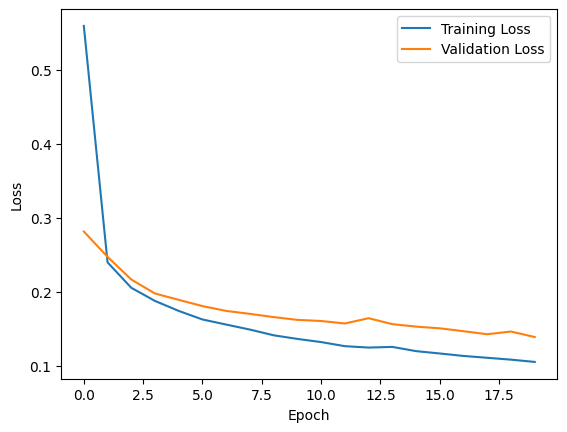

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 6. Building the algorithm LSTM Neural Network by using training and testing datasets.

In [ ]:
#LONG-SHORT-TERM MEMORY NEURAL NETWORK
timesteps = 1  # You can adjust this based on your dataset
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], timesteps, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], timesteps, X_test_scaled.shape[1]))

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=2)

# Evaluate the model
mse = mean_squared_error(y_test, model.predict(X_test_reshaped))
print(f"Mean Squared Error: {mse}")
y_pred_binary = (y_pred > threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")


Epoch 1/20
23/23 - 2s - loss: 0.6044 - val_loss: 0.5285 - 2s/epoch - 77ms/step
Epoch 2/20
23/23 - 0s - loss: 0.4392 - val_loss: 0.3972 - 81ms/epoch - 4ms/step
Epoch 3/20
23/23 - 0s - loss: 0.3246 - val_loss: 0.3060 - 57ms/epoch - 2ms/step
Epoch 4/20
23/23 - 0s - loss: 0.2533 - val_loss: 0.2508 - 57ms/epoch - 2ms/step
Epoch 5/20
23/23 - 0s - loss: 0.2202 - val_loss: 0.2248 - 59ms/epoch - 3ms/step
Epoch 6/20
23/23 - 0s - loss: 0.2054 - val_loss: 0.2080 - 58ms/epoch - 3ms/step
Epoch 7/20
23/23 - 0s - loss: 0.1966 - val_loss: 0.2020 - 72ms/epoch - 3ms/step
Epoch 8/20
23/23 - 0s - loss: 0.1887 - val_loss: 0.1959 - 78ms/epoch - 3ms/step
Epoch 9/20
23/23 - 0s - loss: 0.1828 - val_loss: 0.1884 - 69ms/epoch - 3ms/step
Epoch 10/20
23/23 - 0s - loss: 0.1779 - val_loss: 0.1829 - 71ms/epoch - 3ms/step
Epoch 11/20
23/23 - 0s - loss: 0.1727 - val_loss: 0.1775 - 59ms/epoch - 3ms/step
Epoch 12/20
23/23 - 0s - loss: 0.1690 - val_loss: 0.1744 - 80ms/epoch - 3ms/step
Epoch 13/20
23/23 - 0s - loss: 0.1656 

# Visualizing the LSTM Network using Line chart

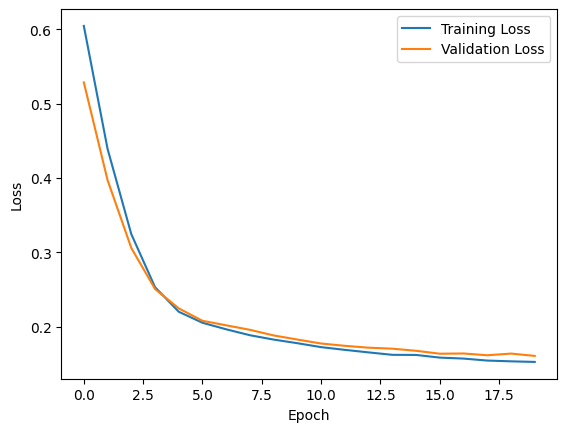

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()